[array([ 1.07557032, -0.9172656 ]), array([ 9.07412175, -5.60852778]), array([6.7609947 , 7.93879878])]


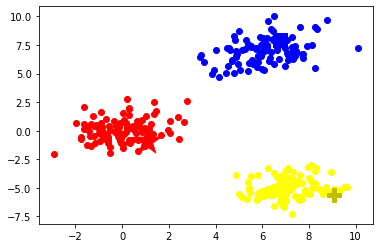

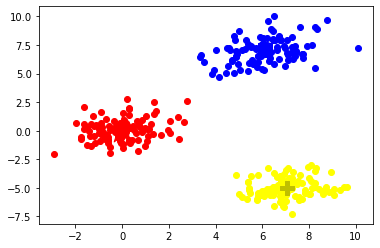

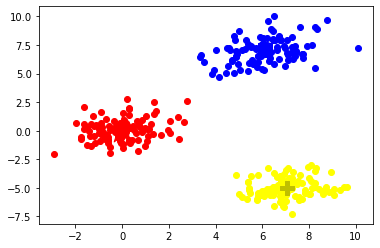

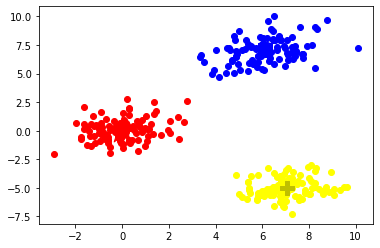

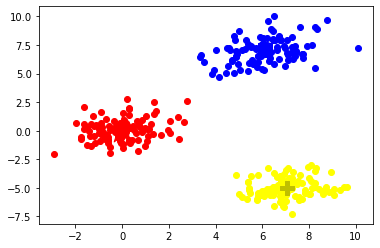

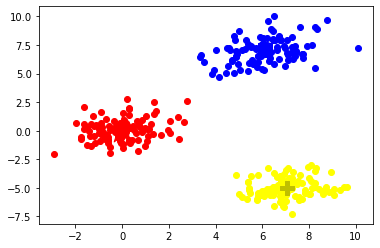

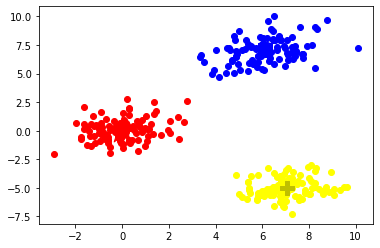

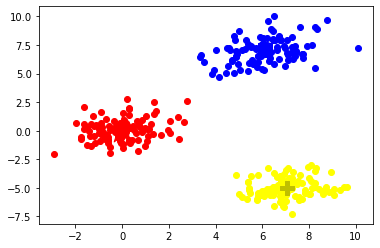

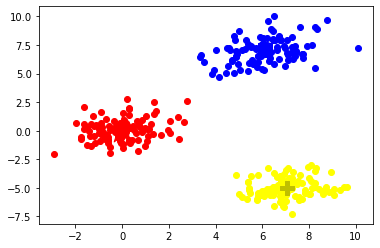

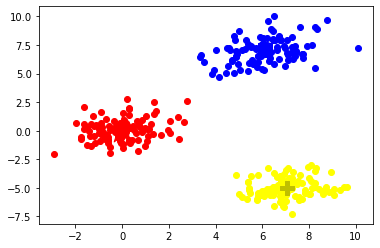

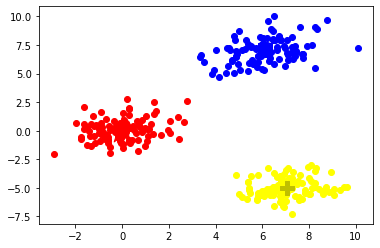

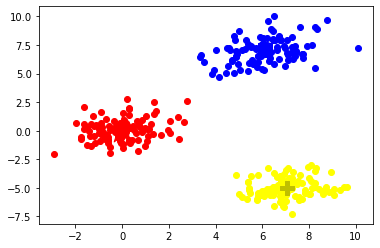

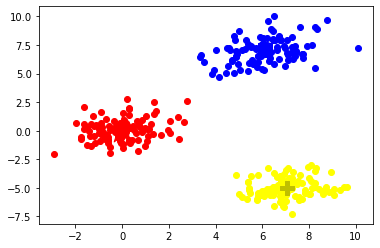

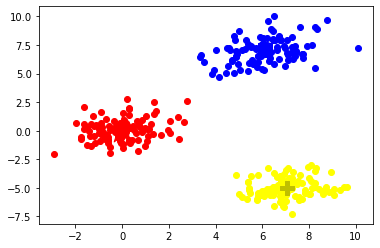

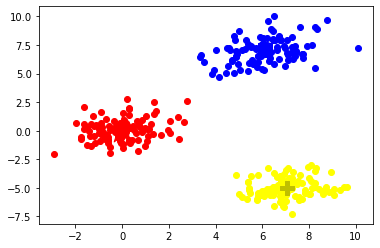

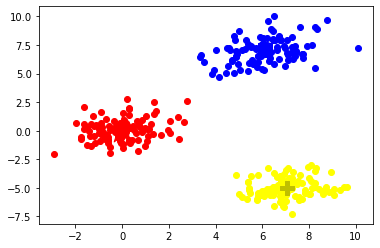

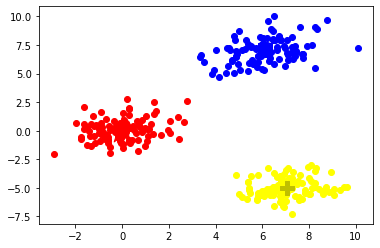

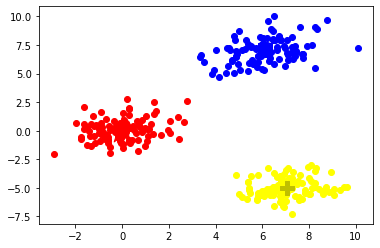

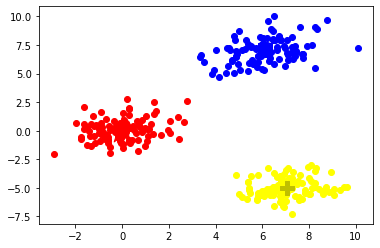

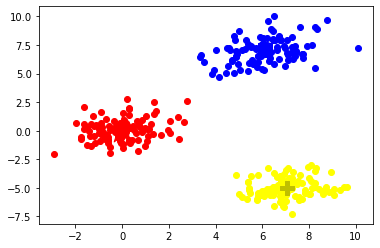

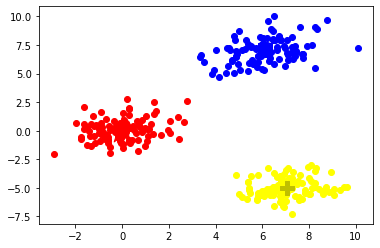

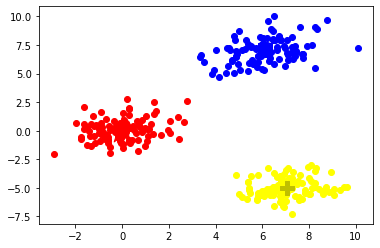

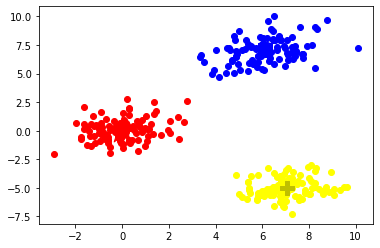

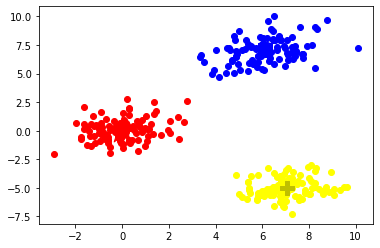

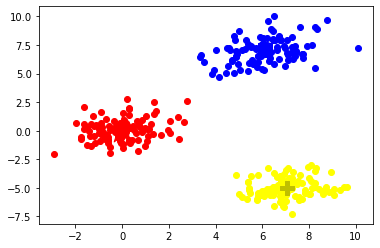

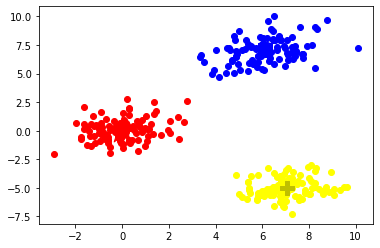

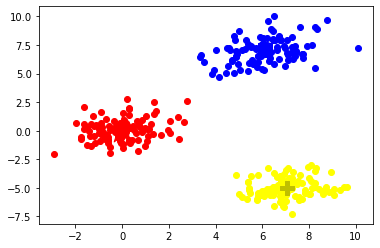

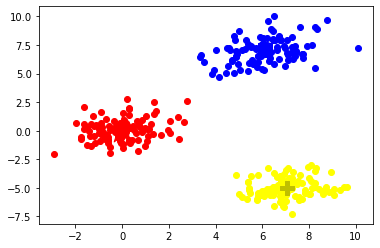

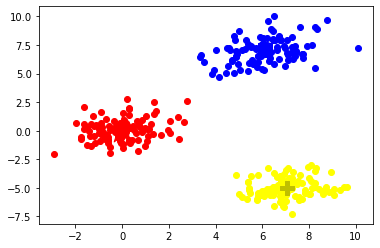

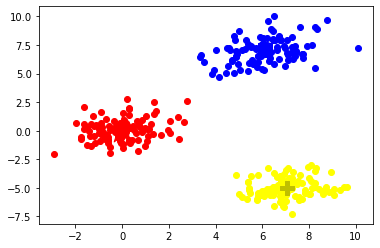

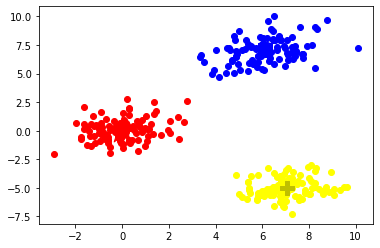

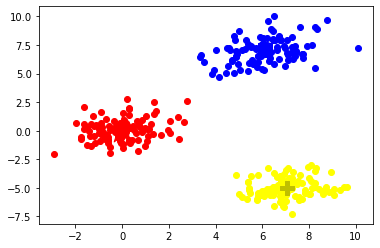

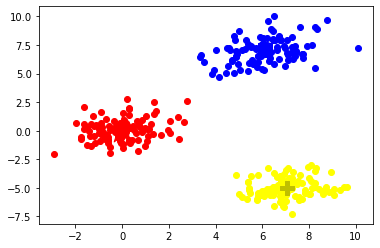

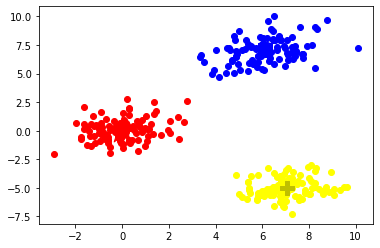

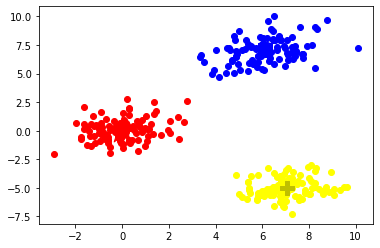

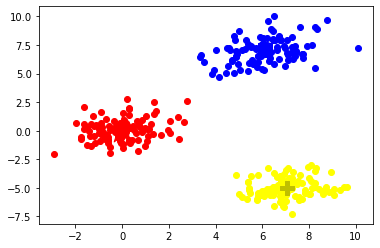

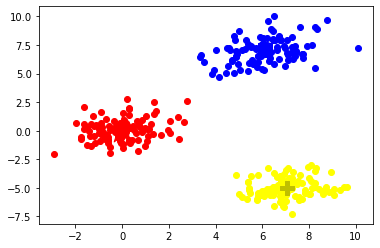

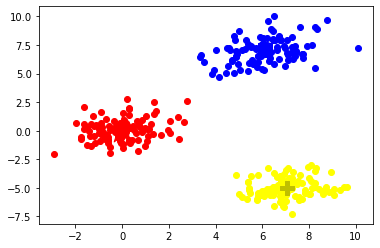

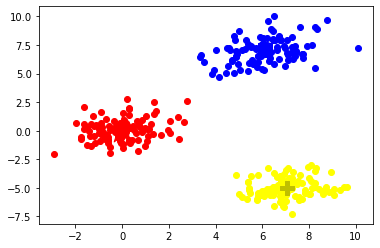

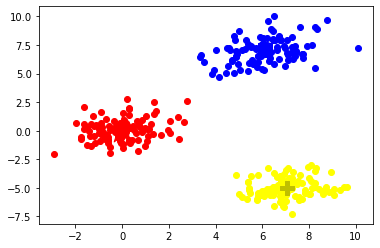

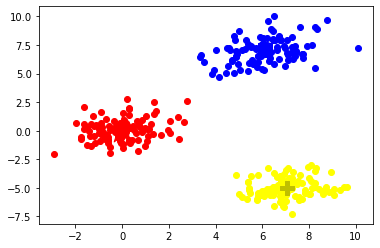

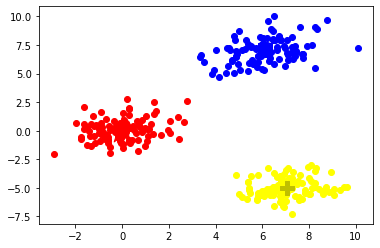

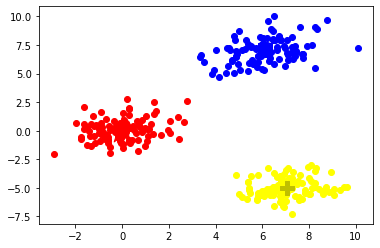

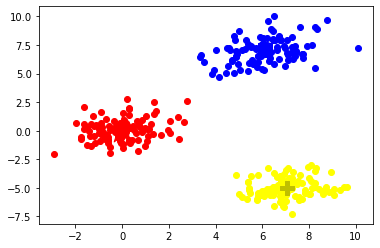

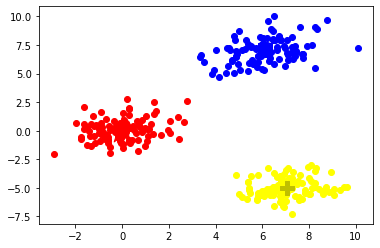

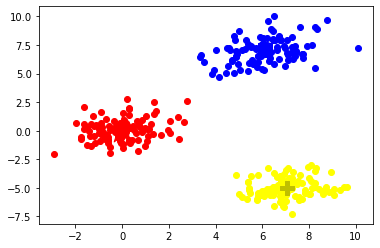

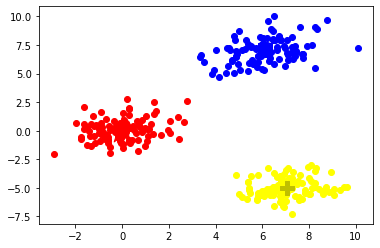

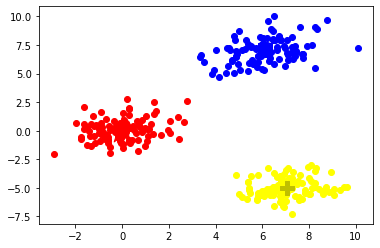

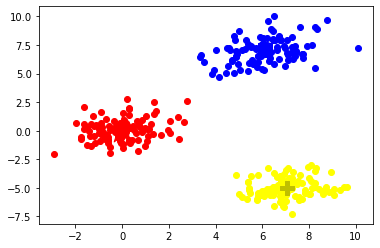

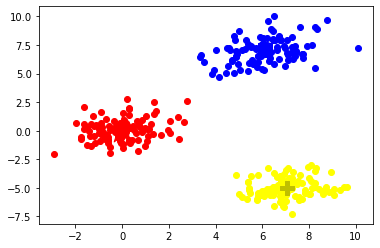

In [16]:
import matplotlib.pyplot as plt
import numpy as np



def random_centroide(data , k):
  
  centroids = []
  for _ in range(k):   
    centroids.append(data[np.random.randint( 
              data.shape[0]), :]) 
    #plot(data, np.array(centroids))
  print(centroids)
  return centroids


def distance(p1 ,p2):
  return (np.linalg.norm(p2 - p1))

def  affectation(data , centroids) :
  dict_data_centroids=dict()
  for i in range(data.shape[0]):
    dist = [distance(data[i],centroids[k]) for k in range(len(centroids)) ]
    
    dict_data_centroids[ (data[i][0], data[i][1]) ] = dist.index(min(dist))
  return dict_data_centroids



def show(data ,dict_data_centroids) :
  l1=[]
  l2=[]
  l3=[]
  l=[l1,l2,l3]
  for i in range(data.shape[0]):
    l[dict_data_centroids[(data[i][0] , data[i][1] )]].append(data[i])

  for i  in range(len(l)):
    l[i] = np.array(l[i]).reshape((-1,2))
  
  plt.scatter(l[0][:,0], l[0][:,1],c="red")
  plt.scatter(l[1][:,0], l[1][:,1],c="yellow")
  plt.scatter(l[2][:,0], l[2][:,1],c="blue")

  
  return  l




mean_01 = np.array([0.0, 0.0]) 
cov_01 = np.array([[1, 0.3], [0.3, 1]]) 
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100) 
   
mean_02 = np.array([6.0, 7.0]) 
cov_02 = np.array([[1.5, 0.3], [0.3, 1]]) 
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100) 
   
mean_03 = np.array([7.0, -5.0]) 
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]]) 
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100) 
  
   
data = np.vstack((dist_01, dist_02, dist_03)) 
np.random.shuffle(data)



k = 3

centroids = random_centroide(data , k)
for i in range(50):  
  dict_data_centroids = affectation(data , centroids) 
  
  show_result = show(data ,dict_data_centroids)
  data = np.vstack((show_result[0] , show_result[1] ,show_result[2] ) )
  
  

  plt.scatter(centroids[0][0], centroids[0][1],c="r" , marker='*',s=800)
  plt.scatter(centroids[1][0], centroids[1][1],c="y" ,  marker='P',s=200)
  plt.scatter(centroids[2][0], centroids[2][1],c="b" , marker='s',s=200)
  plt.show()
  
  centroids= [np.mean(show_result[j] , axis=0) for j in range(3) ]



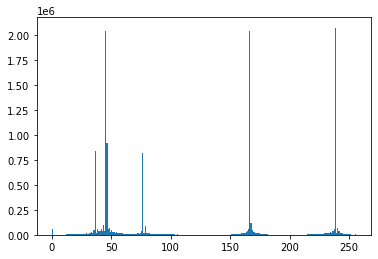

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


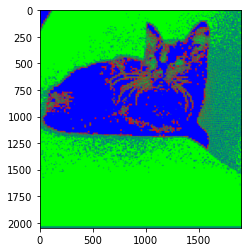

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


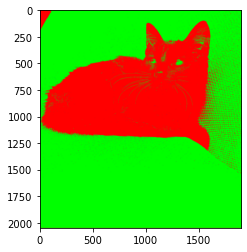

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


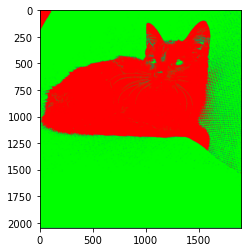

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


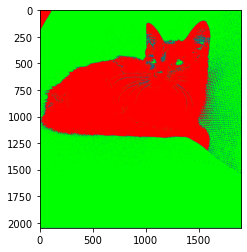

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


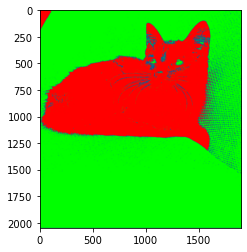

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


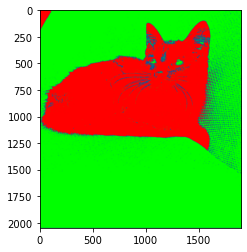

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


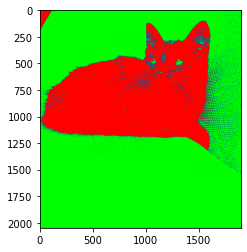

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


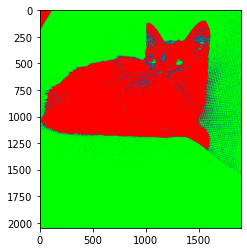

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


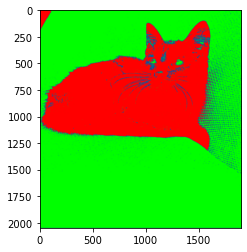

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


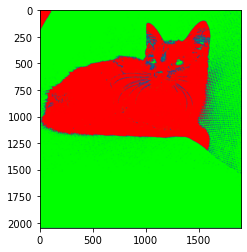

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("/content/cat.jpg")

plt.hist(image.ravel(),256,[0,256]); plt.show()



def voisin(i,j,width,height):
    l=[ [i-1,j-1] ,[i-1,j] ,[i-1 ,j+1] ,
        [i,j-1]     ,[i ,j+1] , [i,j] ,
        [i+1,j-1] ,[i+1,j] ,[i+1 ,j+1] ,
      ]

    final_list = [ ]
    for i in range(len(l)) :
        if l[i][0]>=0 and l[i][0] < height and l[i][1] < height and l[i][1]>=0:
            final_list.append(l[i])  
    return final_list



def random_centroide(data , k):
  centroids = []
  for _ in range(k):   
    centroids.append(data[np.random.randint( data.shape[0])] [np.random.randint( 
              data.shape[1])]) 
  return centroids

def distance(p1 ,p2):
  try :
    return (np.linalg.norm(p2 - p1))
  except:
    print(p1,p2 ,"e")

def  affectation(data , centroids) :
  dict_data_centroids=dict()

  data = data.reshape((data.shape[0],data.shape[1],3))
  
  for i in range(data.shape[0]):
    for j in range(data.shape[1]) :

      dist = [distance(data[i][j],centroids[k]) for k in range(len(centroids)) ]
      
  
      dict_data_centroids[ (i,j) ] = dist.index(min(dist))
  return dict_data_centroids


def update_centroide(features ,dict_data_centroids , k) :
  

  l=[[] for i in range(k)]

  for i in range(features.shape[0]):
    for j in range(features.shape[1]):
      l[dict_data_centroids[(i,j  )]].append(features[i][j] )

  for i  in range(len(l)):
    l[i] = np.array(l[i]).reshape((-1,3)) 
  
  centroides = [np.mean(i,axis=0) for i in l]
  return centroides

def show(data ,dict_data_centroids) :
  
  show_image = np.zeros((data.shape[0],data.shape[1],3))

  colors = [ [255,0,0],[0,255,0],[0,0,255] , [255,255,255]]
  
  for i in range(show_image.shape[0]):
    for j in range(show_image.shape[1]):
      show_image[i][j] =colors[dict_data_centroids[(i,j)] ]

  #cv2.imshow("image",image0)
  plt.imshow(show_image)
  plt.show()
  return show_image

  
features = image
centroides = random_centroide(features , 3)

for i in range(10): 
  dict_data_centroids = affectation(features , centroides)
  show(features ,dict_data_centroids)

  centroides = update_centroide(features ,dict_data_centroids , 3)